<a href="https://colab.research.google.com/github/lucaschenu/Archivo-materia-IA/blob/main/AULA_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
!pip install ucimlrepo

In [ ]:
#carregar base de dados
from ucimlrepo import fetch_ucirepo

# fetch dataset
concrete_compressive_strength = fetch_ucirepo(id=165)

# data (as pandas dataframes)
X = concrete_compressive_strength.data.features
y = concrete_compressive_strength.data.targets

# metadata
print(concrete_compressive_strength.metadata)

# variable information
print(concrete_compressive_strength.variables)


{'uci_id': 165, 'name': 'Concrete Compressive Strength', 'repository_url': 'https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength', 'data_url': 'https://archive.ics.uci.edu/static/public/165/data.csv', 'abstract': 'Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. ', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1030, 'num_features': 8, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Concrete compressive strength'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sun Feb 11 2024', 'dataset_doi': '10.24432/C5PK67', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 383, 'type': 'NATIVE', 'title': 'Modeling of strength of high-performance concrete using artificial neural networks', 'authors': 'I. Yeh', 'venue': 'C

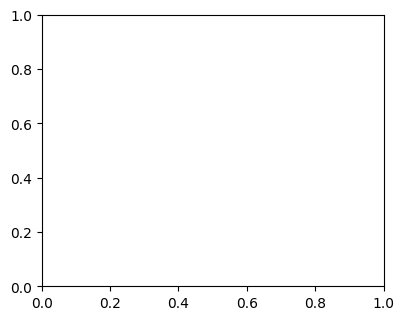

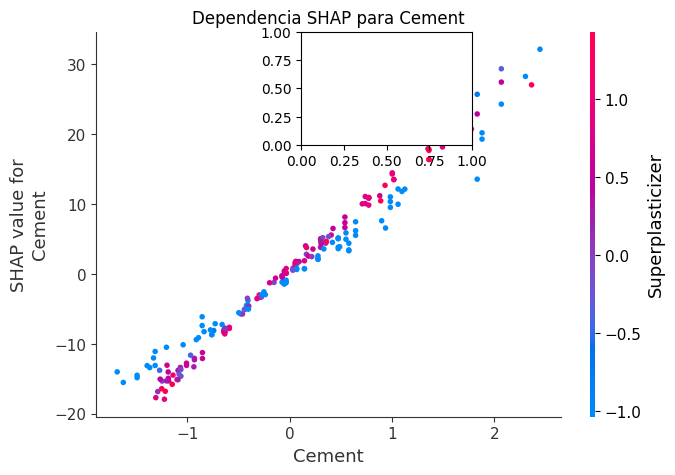

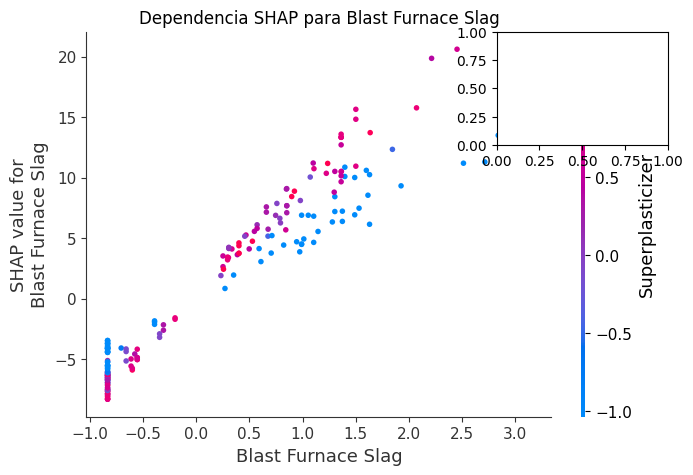

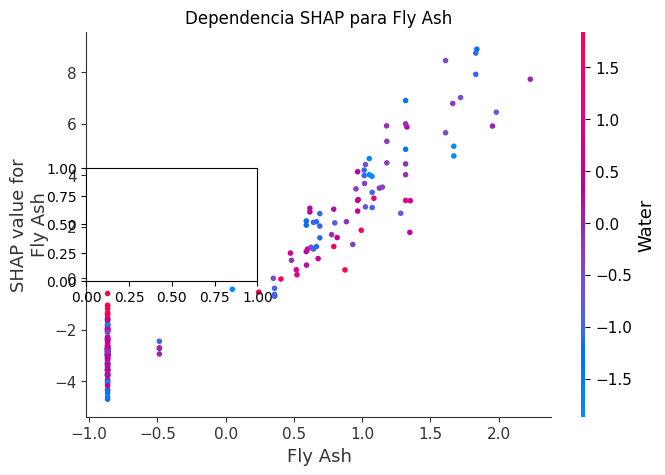

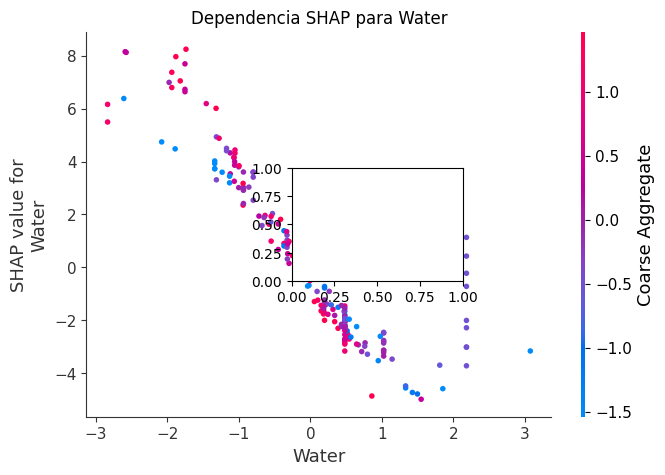

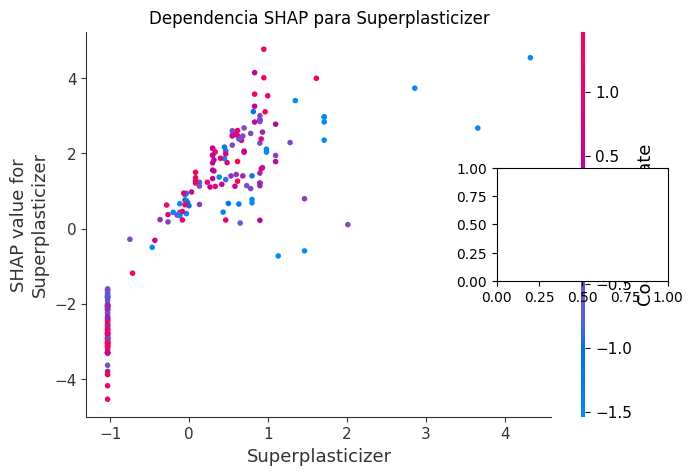

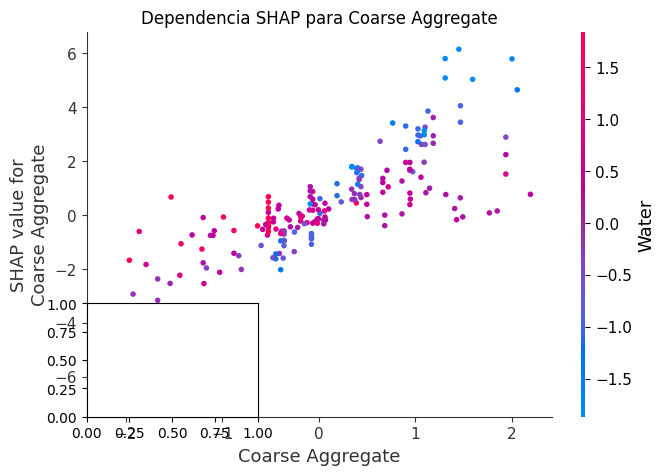

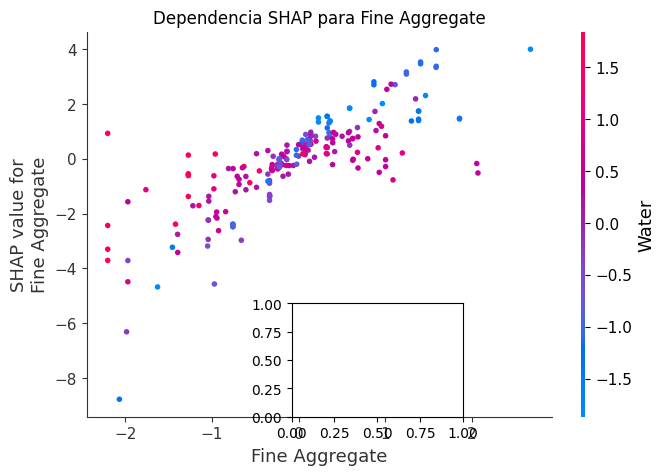

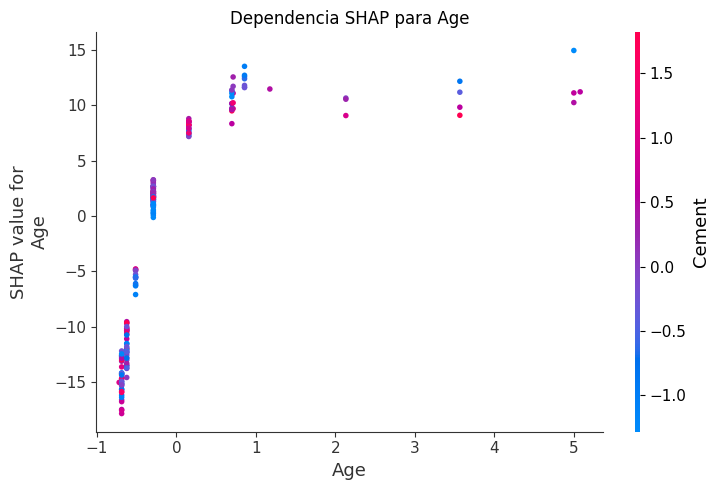

In [ ]:
import matplotlib.pyplot as plt
import shap
import numpy as np

# Obtener los nombres de las características
feature_names = X.columns

# Asegurarse de que shap_values tenga la forma correcta para un solo output
# De (num_samples, 1, num_features) a (num_samples, num_features)
squeezed_shap_values = np.squeeze(shap_values)

# Configurar la figura para múltiples subplots
# Calculamos el número de filas y columnas necesarias
num_features = len(feature_names)
num_cols = 3 # Número de columnas para los subplots
num_rows = (num_features + num_cols - 1) // num_cols # Cálculo para asegurar todas las filas

plt.figure(figsize=(num_cols * 5, num_rows * 4)) # Ajustar el tamaño de la figura

# Iterar sobre cada característica y crear un gráfico de dependencia
for i, feature in enumerate(feature_names):
    plt.subplot(num_rows, num_cols, i + 1) # Crear un subplot para cada característica
    shap.dependence_plot(
        ind=feature,
        shap_values=squeezed_shap_values,
        features=X_val_scaled,
        feature_names=feature_names,
        show=False # Desactivar la visualización automática para controlar con plt.show() final
    )
    plt.title(f'Dependencia SHAP para {feature}') # Añadir un título al subplot

plt.tight_layout() # Ajustar el layout para evitar superposiciones
plt.show()

### Interpretación de los Gráficos de Dependencia SHAP

Cada uno de estos gráficos de dependencia SHAP te muestra cómo un solo parámetro (característica) afecta la predicción de tu modelo, después de tener en cuenta el impacto de todas las demás características. Aquí te explico cómo interpretarlos:

*   **Eje X (Valor de la Característica):** Representa el rango de valores de la característica específica que se está analizando.
*   **Eje Y (Valor SHAP):** Muestra el impacto en la predicción del modelo para esa característica. Los valores SHAP positivos indican que la característica aumenta la predicción del modelo, mientras que los valores negativos indican que la disminuye. Un valor SHAP de 0 significa que la característica no tiene impacto en la predicción para ese punto.
*   **Color de los Puntos:** Por defecto, los puntos están coloreados por el valor de otra característica (`interaction_index`) que tiene la mayor interacción con la característica en el eje X. Esto te ayuda a ver cómo la interacción entre dos características puede afectar el impacto en la predicción.

**Ejemplo de Interpretación:**

Si observas el gráfico para 'Cement':
*   Un punto a la izquierda del eje X (bajo valor de 'Cement') y con un valor SHAP negativo, significa que una baja cantidad de cemento contribuye a una menor resistencia a la compresión del concreto.
*   Un punto a la derecha del eje X (alto valor de 'Cement') y con un valor SHAP positivo, significa que una alta cantidad de cemento contribuye a una mayor resistencia a la compresión del concreto.

Estos gráficos son cruciales para entender las relaciones no lineales y las interacciones que tu modelo ha aprendido, dándote una visión más profunda de cómo cada componente afecta la predicción de la fuerza del concreto.

In [ ]:
#dividir os dados em conjunto de treinamento e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=4 )

In [ ]:
#escalonar as variaveis
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [ ]:
X_train.shape[1]

8

In [ ]:
# construir el modelo de redes neurais sequenciais
model = keras.Sequential([
    layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(32, activation="relu"),
    layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#compilar o modelo
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#treinar o modelo
history= model.fit(
    X_train, y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=200,
    verbose=1
)

Epoch 1/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 1485.9126 - mae: 35.0936 - val_loss: 1358.0005 - val_mae: 32.9129
Epoch 2/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1270.7390 - mae: 31.9690 - val_loss: 856.1287 - val_mae: 24.8751
Epoch 3/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 746.1955 - mae: 22.5680 - val_loss: 254.0443 - val_mae: 12.9392
Epoch 4/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 261.8723 - mae: 12.9916 - val_loss: 219.0148 - val_mae: 11.7854
Epoch 5/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 234.3960 - mae: 12.3819 - val_loss: 192.3365 - val_mae: 11.2281
Epoch 6/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 225.3016 - mae: 12.2094 - val_loss: 185.7516 - val_mae: 11.0037
Epoch 7/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 190.2325 - mae: 11.2001 - val_loss: 175.0488 - val_mae: 10.7698
Epoch 8/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 185.3614 - mae: 10.9884 - val_loss: 169.4032 - val_mae: 10.5573
Epoch

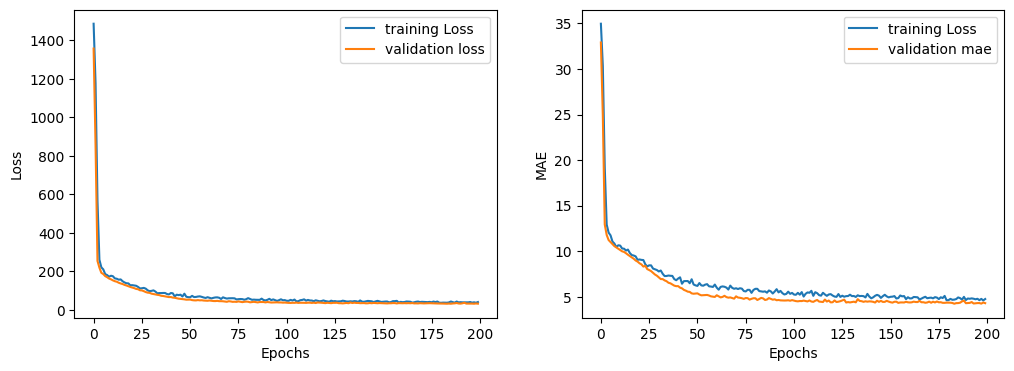

In [ ]:
#plotar a história do treinamento do modelo
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label="training Loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label="training Loss")
plt.plot(history.history["val_mae"], label="validation mae")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()

plt.show()

In [ ]:
#FAZER PREDICOES
y_pred = model.predict(X_val_scaled)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [ ]:
#calcular as metricas de avaliacao
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae=mean_absolute_error(y_val, y_pred)
r2=r2_score(y_val, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2:{r2}")

RMSE: 5.50
MAE: 4.01
R2:0.9001538753509521


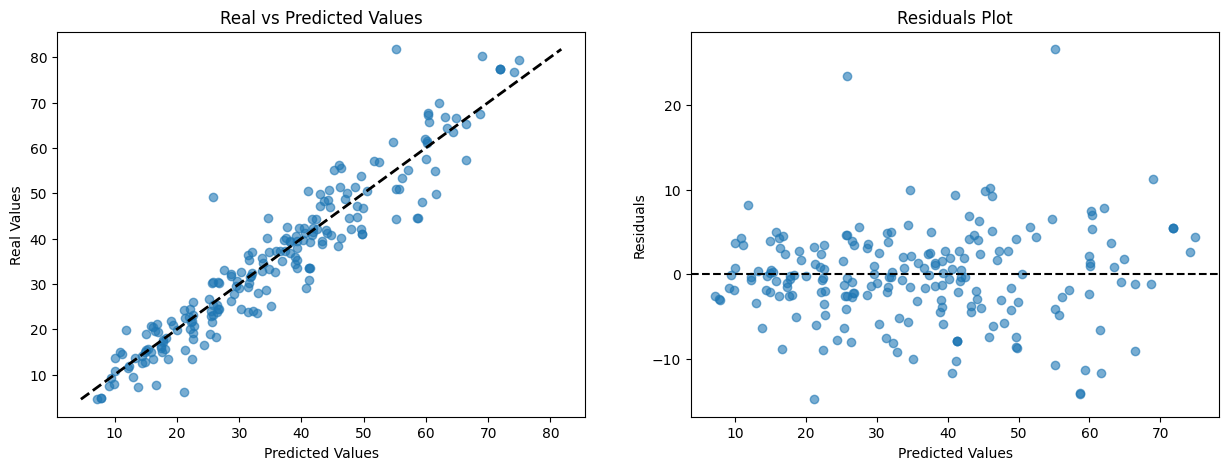

In [ ]:
#fazer o plot dos valores reais vs preditos
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(y_pred, y_val, alpha=0.6) # Plot real vs predicted values
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2) # Diagonal reference line
plt.xlabel("Predicted Values")
plt.ylabel("Real Values") # Corrected label
plt.title("Real vs Predicted Values") # Added a title for clarity

#plot dos resultados
plt.subplot(1,2,2)
residuals=y_val-y_pred
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color="k", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot") # Added a title for clarity
plt.show()

In [ ]:
#calcular a importancia das variaveis por SHAP
import shap


In [ ]:
#inicializar o SHAP
explainer= shap.KernelExplainer(model.predict, X_train)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
#calcular valores SHAP  para os dados de teste
shap_values=explainer.shap_values(X_val_scaled)

  0%|          | 0/206 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
6541/6541 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
6541/6541 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
6541/6541 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
6541/6541 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
6541/6541 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
6541/6541 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
6541/6541 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
6541/6541 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
6541/6541 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
6541/6541 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
6541/6541 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
6541/6541 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━

<Figure size 1000x800 with 0 Axes>

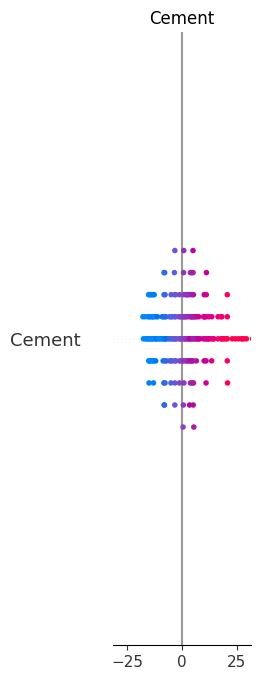

In [ ]:
#plot SHAP
plt.figure(figsize=(10,8))
shap.summary_plot(shap_values, X_val_scaled,
                  feature_names=X.columns,
                  show=False)
plt.show()

<Figure size 1000x800 with 0 Axes>

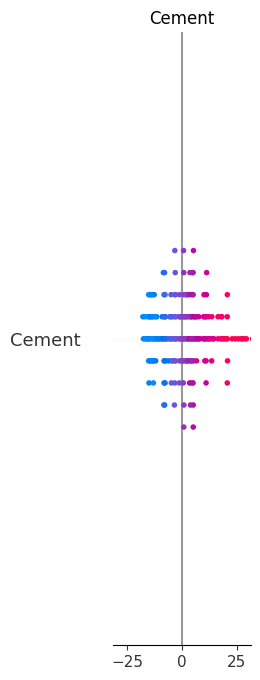

In [ ]:
#plot SHAP bar
plt.figure(figsize=(10,8))
shap.summary_plot(shap_values, X_val_scaled,
                  feature_names=X.columns,
                  plot_type="bar")
plt.show()